# 了解RAG 中的 Embedding Vectors

1. 什么是`embedding`
2. Sentence BERT
3. 如何选取`embedding model`

## 什么是`embedding`

考虑一下如何表示“男人” ， “女人”，我们可以从性别上出发，假设男性性别可以表示‘1’ ， 女性性别可以表示为‘9’，即可将“男人” ， “女人”区分开来

那么当加入“男孩” ，“女孩”的时候，单纯靠性别已经无法完全区分上述四个单词，此时可以引入年龄， **"男人"：[1,35] , "女人":[9,35] , "男孩"：[1,10] , "女孩":[9,10]**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

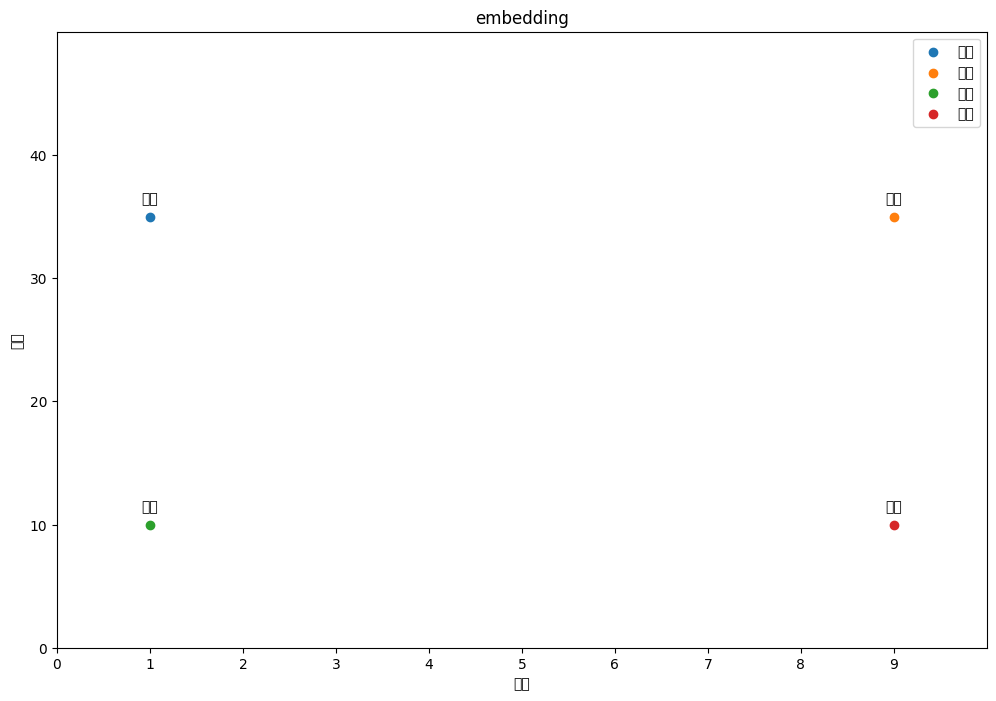

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义点的坐标和标签
points = {
    "男人": [1, 35],
    "女人": [9, 35],
    "男孩": [1, 10],
    "女孩": [9, 10]
}

x_values = [point[0] for point in points.values()]
y_values = [point[1] for point in points.values()]
labels = list(points.keys())

plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    plt.scatter(x_values[i], y_values[i], label=label)

# 设置X轴和Y轴的范围和精度
plt.xlim([0,10])
plt.ylim([0,50])
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 50, 10))

# 添加标签
for i, label in enumerate(labels):
    plt.annotate(label, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
# 设置图表标题和坐标轴标签
plt.title("embedding")
plt.xlabel("性别")
plt.ylabel("年龄")
# 显示图例
plt.legend()
# 显示图表
plt.show()


随着词汇的逐渐增加，二维已经不足以区分单词，例如引入新的单词 “国王” ，“皇后”,只靠年龄和性别，已经无法区分国王 —— 男人 ， 皇后———女人

所以我们引入新的特征，例如'皇室的' ，则 **"男人": [1, 35, 1], "女人": [9, 35, 1],"男孩": [1, 10, 1],"女孩": [9, 10, 1],"国王": [1, 35, 9],"皇后": [9, 35, 9]**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30343 (\N{CJK UNIFIED IDEOGRAPH-7687}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23460 (\N{CJK UNIFIED IDEOGRAPH-5BA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29579 (\N{CJK UNIFIED IDEOGRAPH-738B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


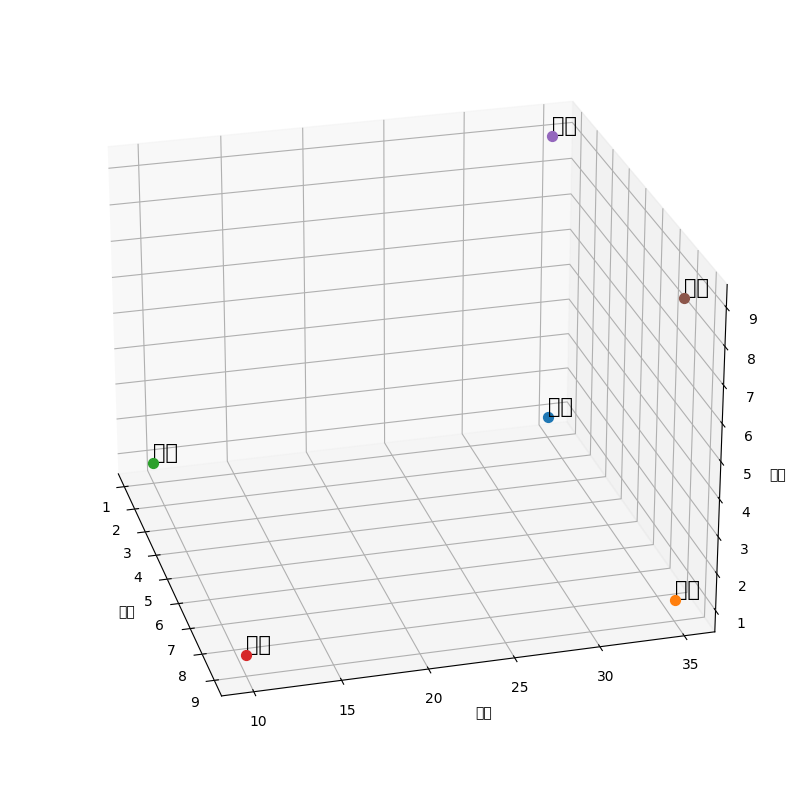

In [2]:
points = {
    "男人": [1, 35, 1],
    "女人": [9, 35, 1],
    "男孩": [1, 10, 1],
    "女孩": [9, 10, 1],
    "国王": [1, 35, 9],
    "皇后": [9, 35, 9]
}

x_coords = [point[0] for point in points.values()]
y_coords = [point[1] for point in points.values()]
z_coords = [point[2] for point in points.values()]
labels = list(points.keys())

# 创建图形和三维坐标轴
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(labels):
    ax.scatter(x_coords[i], y_coords[i], z_coords[i], label=label , s=50)

# 为每个点添加标签，并设置偏移量
for i, label in enumerate(labels):
    ax.text(x_coords[i], y_coords[i], z_coords[i], label, fontsize=15, horizontalalignment='left', verticalalignment='bottom')


# 设置标签
ax.set_xlabel('性别')
ax.set_ylabel('年龄')
ax.set_zlabel('皇室')

# 调整视角
ax.view_init(elev=25., azim= -15)
# 显示图形
plt.show()


# embedding模型选取

## m3e模型

In [3]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 2.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [4]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('moka-ai/m3e-base')

#Our sentences we like to encode
sentences =['为什么良好的睡眠对健康至关重要?' ,
        '良好的睡眠有助于身体修复自身,增强免疫系统',
        '在监督学习中，算法经常需要大量的标记数据来进行有效学习',
        '睡眠不足可能导致长期健康问题,如心脏病和糖尿病',
        '这种学习方法依赖于数据质量和数量',
        '它帮助维持正常的新陈代谢和体重控制',
        '睡眠对儿童和青少年的大脑发育和成长尤为重要',
        '良好的睡眠有助于提高日间的工作效率和注意力',
        '监督学习的成功取决于特征选择和算法的选择',
        '量子计算机的发展仍处于早期阶段，面临技术和物理挑战',
        '量子计算机与传统计算机不同，后者使用二进制位进行计算',
        '机器学习使我睡不着觉',
]
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/932 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/409M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/439k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
len(embeddings)

12

In [6]:
len(embeddings[0])

768

In [7]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2 ,  perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20160 (\N{CJK UNIFIED IDEOGRAPH-4EC0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20040 (\N{CJK UNIFIED IDEOGRAPH-4E48}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

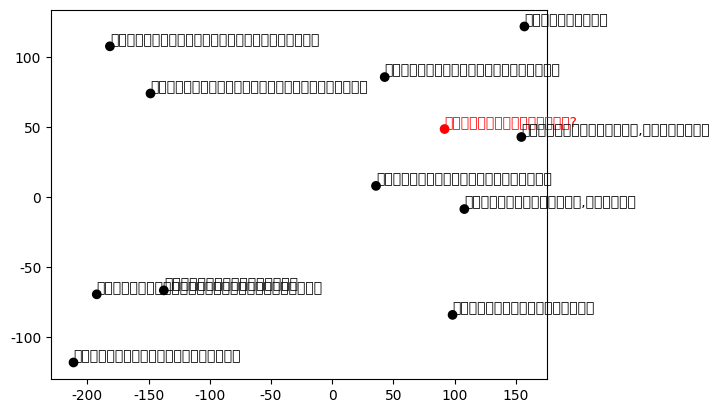

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False


color_list =  ['black'] * len(embeddings_2d[1:])
color_list.insert(0, 'red')

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1] , color=color_list )

for i in range(len(embeddings_2d)):
    plt.text(embeddings_2d[:,0][i], embeddings_2d[:,1][i]+2,  sentences[i] ,color=color_list[i] )

# 显示图表
plt.show()

## openai text-embedding-ada-002 embedding模型

In [9]:
! pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.6 MB/s eta 0:00:00


In [10]:
import openai
import os
OPENAI_API_KEY = getpass()

openai.api_key = OPENAI_API_KEY

In [11]:
import openai
response = openai.Embedding.create(
  input=sentences,
  model="text-embedding-ada-002",
)

In [12]:
embeddings_openai = [item['embedding'] for item in response['data']]

tsne = TSNE(n_components=2 ,  perplexity=5)
embeddings_openai_2d = tsne.fit_transform(np.array(embeddings_openai))

In [13]:
len(embeddings_openai)

12

In [14]:
len(embeddings_openai[0])

1536

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20160 (\N{CJK UNIFIED IDEOGRAPH-4EC0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20040 (\N{CJK UNIFIED IDEOGRAPH-4E48}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

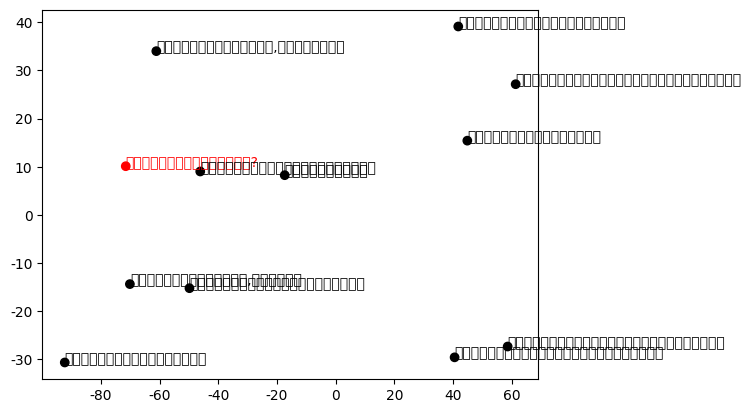

In [15]:
plt.scatter(embeddings_openai_2d[:, 0], embeddings_openai_2d[:, 1] , color=color_list )

for i in range(len(embeddings_openai_2d)):
    plt.text(embeddings_openai_2d[:,0][i], embeddings_openai_2d[:,1][i],  sentences[i] ,color=color_list[i] )

# 显示图表
plt.show()